In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import astropy.stats as aps

% matplotlib inline

def init_plotting(x=9,y=7):
    plt.rcParams['figure.figsize'] = (x,y)
    plt.rcParams['font.size'] = 15
    plt.rcParams['figure.facecolor'] = '#ffffff'
    # plt.rcParams['font.family'] = 'Asana Math'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 0.75*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.fontsize'] = 8
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()


## Dados e Filtragemda Amostra

In [3]:
exo = pd.read_csv('exoplanet.eu_catalog.csv') #abrindo tabela de exoplanets.eu

#Condições necessárias pra definição da amostra, usei 3 campos diferentes que indicam métodos de detecção

raionull = exo['mass'].notnull() #filtro de linhas com valor de raio não nulo 
massanull = exo['radius'].notnull() #filtro de linhas com valor de massa não nulo
confirmed = exo['planet_status'] == 'Confirmed' #filtro de planetas confirmados
massj = exo['mass'] > 0.1 #filtro de planetas com massa > 0.1 M_j
transito = (exo['detection_type'] == 'Primary Transit') & (exo['radius_detection_type'] == 'Primary Transit') #filtro por detecção de trânsito
ttv = (exo['detection_type'] == 'TTV') | (exo['detection_type'] == 'Primary Transit, TTV') | (exo['mass_detection_type'] == 'TTV') #filtro por detecção TTV
rv = (exo['detection_type'] == 'Radial Velocity') | (exo['mass_detection_type'] == 'Radial Velocity') #filtro por detecção de velocidade radial

In [4]:
# Montando a amostra e contando

amostra=(exo[massj & confirmed & transito & raionull & massanull & (ttv | rv)]) #aplicando os filtros a tabela original para extrair a amostra
amostra


,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
86,CVSO 30 b,Confirmed,6.200,1.7000,1.9000,5.500,1.400,1.4000,1.910,0.210,...,M3 PMS,0.00265,0.00003,0.000030,3740.0,NaN,NaN,NaN,NaN,PTFO 8-8695
93,CoRoT-15 b,Confirmed,63.400,4.1000,4.3000,63.300,4.000,4.0000,1.120,0.150,...,F7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2MASS J06282781+0611105
108,CoRoT-28 b,Confirmed,0.484,0.0870,0.0870,0.484,0.087,0.0870,0.955,0.066,...,G8/9IV,12.00000,1.50000,1.500000,5150.0,100.0,100.0,NaN,NaN,NaN
109,CoRoT-29 b,Confirmed,0.850,0.2000,0.2000,0.850,0.200,0.2000,0.900,0.160,...,KOV,4.50000,3.50000,3.500000,5260.0,100.0,100.0,NaN,NaN,NaN
112,CoRoT-31 b,Confirmed,0.840,0.3400,0.3400,NaN,NaN,NaN,1.460,0.300,...,G2IV,4.70000,2.20000,4.700000,5370.0,126.0,99.0,NaN,NaN,NaN
113,CoRoT-32 b,Confirmed,0.150,0.1000,0.1000,NaN,NaN,NaN,0.570,0.060,...,G0VI,NaN,NaN,NaN,5970.0,100.0,100.0,NaN,NaN,CoRoT-223977153
114,CoRoT-33 b,Confirmed,59.200,1.8000,1.8000,59.000,1.800,1.8000,1.100,0.530,...,G9V,4.60000,0.00000,5.000000,5225.0,80.0,80.0,NaN,NaN,"2MASS 18383391 + 0537287, USNO-A2 0900-13338694"
133,EPIC 201637175 b,Confirmed,1.400,1.4000,0.0000,1.400,1.400,0.0000,0.250,0.250,...,M0V,NaN,NaN,NaN,3830.0,100.0,100.0,NaN,NaN,NaN
144,EPIC 211391664 b,Confirmed,0.101,0.0250,0.0250,NaN,NaN,NaN,0.380,0.018,...,F8V,5.20000,1.00000,1.200000,6120.0,80.0,80.0,NaN,NaN,"2MASS 08255719+1130402, K2-98"
145,EPIC 211418729 b,Confirmed,1.850,0.2300,0.2200,NaN,NaN,NaN,0.942,0.032,...,NaN,9.90000,2.30000,3.200000,5027.0,62.0,57.0,NaN,NaN,NaN


## Obtendo a Densidade

In [5]:
# Densidade E barras de erro da densidade

densidade=amostra.mass/((4*math.pi*amostra.radius**3)/3)
denserrosup = ((3*amostra.mass*amostra.mass_error_max/(4*math.pi*amostra.radius**3))**2 + (9*amostra.mass*amostra.radius_error_max/(4*math.pi*amostra.radius**4))**2)**0.5
denserroinf = ((3*amostra.mass*amostra.mass_error_min/(4*math.pi*amostra.radius**3))**2 + (9*amostra.mass*amostra.radius_error_min/(4*math.pi*amostra.radius**4))**2)**0.5


/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

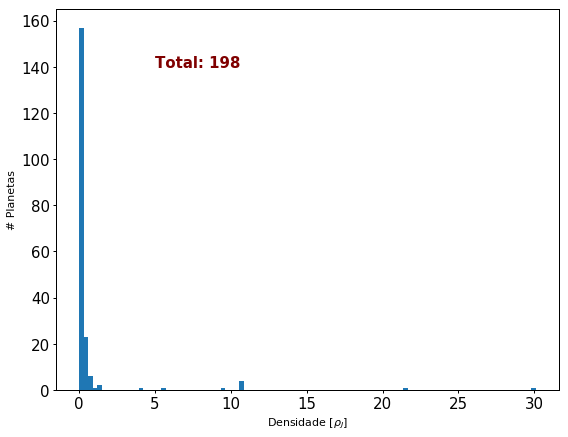

In [20]:
# Histograma
plt.hist(densidade,100)
plt.xlabel('Densidade [$\\rho_{J}$]',fontsize=11)
plt.ylabel('# Planetas',fontsize=11)
plt.text(5,140,'Total: 198',fontweight='bold',color='maroon')

amostra['density'] = densidade #adicionando a densidade à tabela de amostras filtradas
amostra['density_error_max'] = denserrosup
amostra['density_error_min'] = denserroinf

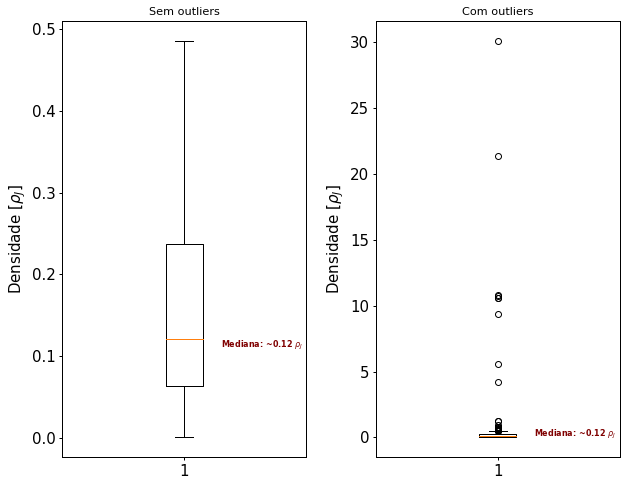

In [19]:
# Boxplot
plt.subplot(1,2,1)
# escondendo outliers
plt.title('Sem outliers')
plt.boxplot(densidade, showfliers = False)
plt.ylabel('Densidade [$\\rho_{J}$]')
plt.text(1.15,0.11,'Mediana: ~0.12 $\\rho_{J}$',fontweight='bold',color='maroon',size = 8)

plt.subplot(1,2,2)
plt.title('Com outliers')
plt.boxplot(densidade, showfliers = True)
plt.ylabel('Densidade [$\\rho_{J}$]')
plt.text(1.15,0.11,'Mediana: ~0.12 $\\rho_{J}$',fontweight='bold',color='maroon',size = 8)

plt.tight_layout()

## Obtendo Média e Desvio Padrão por Jackknife

In [30]:
dens = np.array(amostra['density'])

teste_estatistico = np.mean
media, bias, desvio_padrao, intervalo_conf = aps.jackknife_stats(dens, teste_estatistico,0.95)

print ('Média = ' + str(media))
print ('Desvio Padrão = ' +str(desvio_padrao))

Média = 0.7503881533552768
Desvio Padrão = 0.21835508113931343


## Salvando Tabelas das Classes dos Planetas

In [34]:
fluffy_filter = amostra['density'] < 1 - 2*desvio_padrao #filtro para identificar fluffies
bricky_filter = amostra['density'] > 1 + 2*desvio_padrao #filtro para identificar brickies

amostra_fluffy = amostra[fluffy_filter]
amostra_bricky = amostra[bricky_filter]
amostra_regular = amostra[np.logical_not(bricky_filter) &  np.logical_not(fluffy_filter)]

amostra_fluffy.to_csv('fluffy_sample.csv',index = False)
amostra_bricky.to_csv('bricky_sample.csv', index = False)

amostra_regular

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,density,density_error_max,density_error_min
352,HATS-17 b,Confirmed,1.338,0.065,0.065,1.338,0.065,0.065,0.777,0.056,...,1.300,5846.0,78.0,78.0,NaN,NaN,NaN,0.680933,0.153738,0.153738
358,HATS-22 b,Confirmed,2.740,0.110,0.110,NaN,NaN,NaN,0.953,0.029,...,5.800,4803.0,55.0,55.0,NaN,NaN,NaN,0.755759,0.141252,0.108034
377,HATS-41 b,Confirmed,9.700,1.600,1.600,NaN,NaN,NaN,1.330,0.200,...,0.310,6424.0,91.0,91.0,NaN,NaN,NaN,0.984302,1.701417,1.636286
3450,MASCARA-2 b,Confirmed,17.000,17.000,0.000,NaN,NaN,NaN,1.830,0.070,...,0.100,8980.0,90.0,130.0,NaN,NaN,HD 185603,0.662227,0.075993,11.258120
3570,Qatar-3 b,Confirmed,4.310,0.470,0.470,NaN,NaN,NaN,1.096,0.140,...,0.001,6007.0,52.0,52.0,NaN,NaN,UCAC3 253-304972,0.781550,0.473952,0.473952
3572,Qatar-5 b,Confirmed,4.320,0.180,0.180,NaN,NaN,NaN,1.107,0.064,...,0.004,5747.0,49.0,49.0,NaN,NaN,UCAC3 265-004681,0.760243,0.190033,0.190033
3676,WASP-162 b,Confirmed,5.200,0.200,0.200,NaN,NaN,NaN,1.000,0.050,...,10.000,5300.0,100.0,100.0,NaN,NaN,NaN,1.241409,0.310352,0.310352
3764,WASP-86 b,Confirmed,0.821,0.056,0.056,NaN,NaN,NaN,0.632,0.013,...,0.800,6330.0,110.0,110.0,NaN,NaN,"KELT-12, 2MASS J17503372+3634128, TYC 2619-105...",0.776432,0.067475,0.064701
3767,WASP-89 b,Confirmed,5.900,0.400,0.400,5.900,0.400,0.400,1.040,0.040,...,0.800,4955.0,100.0,100.0,NaN,NaN,NaN,1.252170,0.521290,0.521290


In [35]:
amostra_fluffy

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,density,density_error_max,density_error_min
86,CVSO 30 b,Confirmed,6.200,1.7000,1.9000,5.500,1.400,1.4000,1.910,0.2100,...,0.000030,3740.0,NaN,NaN,NaN,NaN,PTFO 8-8695,0.212424,0.409642,0.367855
108,CoRoT-28 b,Confirmed,0.484,0.0870,0.0870,0.484,0.087,0.0870,0.955,0.0660,...,1.500000,5150.0,100.0,100.0,NaN,NaN,NaN,0.132662,0.029828,0.029828
109,CoRoT-29 b,Confirmed,0.850,0.2000,0.2000,0.850,0.200,0.2000,0.900,0.1600,...,3.500000,5260.0,100.0,100.0,NaN,NaN,NaN,0.278357,0.158552,0.158552
112,CoRoT-31 b,Confirmed,0.840,0.3400,0.3400,NaN,NaN,NaN,1.460,0.3000,...,4.700000,5370.0,126.0,99.0,NaN,NaN,NaN,0.064437,0.045362,0.045362
113,CoRoT-32 b,Confirmed,0.150,0.1000,0.1000,NaN,NaN,NaN,0.570,0.0600,...,NaN,5970.0,100.0,100.0,NaN,NaN,CoRoT-223977153,0.193365,0.064051,0.064051
144,EPIC 211391664 b,Confirmed,0.101,0.0250,0.0250,NaN,NaN,NaN,0.380,0.0180,...,1.200000,6120.0,80.0,80.0,NaN,NaN,"2MASS 08255719+1130402, K2-98",0.439422,0.094308,0.063403
145,EPIC 211418729 b,Confirmed,1.850,0.2300,0.2200,NaN,NaN,NaN,0.942,0.0320,...,3.200000,5027.0,62.0,57.0,NaN,NaN,NaN,0.528361,0.121013,0.132918
146,EPIC 211442297 b,Confirmed,0.840,0.1800,0.2000,NaN,NaN,NaN,1.115,0.0570,...,4.200000,5560.0,56.0,58.0,NaN,NaN,NaN,0.144666,0.037428,0.034210
157,EPIC 216468514 b,Confirmed,0.840,0.0800,0.0800,NaN,NaN,NaN,1.440,0.1500,...,1.750000,6030.0,120.0,120.0,NaN,NaN,"2MASS 18595649-221736, EPIC 216468514",0.067159,0.021664,0.021664
162,EPIC 220501947 b,Confirmed,0.336,0.0120,0.0120,NaN,NaN,NaN,0.947,0.0050,...,NaN,4444.0,70.0,70.0,NaN,NaN,2MASS 01182635+0649004,0.094450,0.003765,0.001877
